In [ ]:
pip install pyzx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 295 kB 4.4 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=f6f34e1ac5dd0be4e2ca861eefdc88cd490bd92004bf2d120bd6e32c2bfdef3f
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
import random
import pyzx as zx

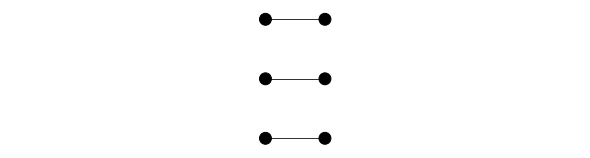

In [ ]:
c = zx.qasm("""
qreg q[3];
 """)

zx.draw_matplotlib(c)

In [ ]:
zx.draw_d3(c)

In [ ]:
circuit = zx.generate.CNOT_HAD_PHASE_circuit(qubits=4,depth=20,clifford=True)

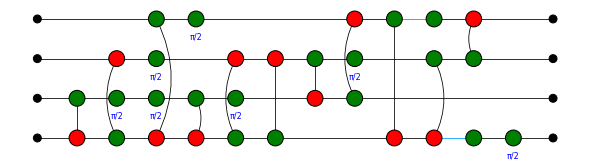

In [ ]:
zx.draw_matplotlib(circuit)

In [ ]:
print(circuit.gates)

[CNOT(2,3), CNOT(3,1), S(2), S(1), CNOT(0,3), S(2), CNOT(2,3), CNOT(3,1), CNOT(3,1), S(0), S(2), CNOT(1,2), CNOT(2,0), S(1), CNOT(0,3), CNOT(1,3), HAD(3), HAD(0), CNOT(1,0), S(3)]


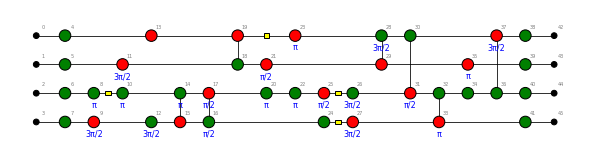

In [ ]:
qubit_amount = 4
depth = 15
random.seed(1337)
circ = zx.generate.cliffords(qubit_amount, depth)
zx.draw_matplotlib(circ,labels=True,h_edge_draw='box')

In [ ]:
g = circuit.to_graph()

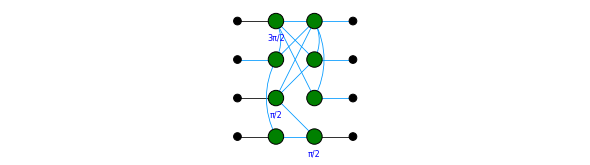

In [ ]:
zx.clifford_simp(g)  # simplifies the diagram
g.normalize()  # makes it more presentable
zx.draw_matplotlib(g)


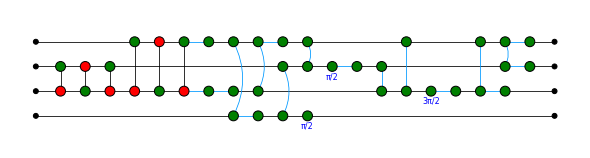

In [ ]:
c = zx.extract_circuit(g.copy())
zx.draw_matplotlib(c)

In [ ]:
c = zx.generate.CNOT_HAD_PHASE_circuit(qubits=8, depth=100)
print(c.stats())

Circuit  on 8 qubits with 100 gates.
        30 is the T-count
        70 Cliffords among which 
        54 2-qubit gates (54 CNOT, 0 other) and
        16 Hadamard gates.


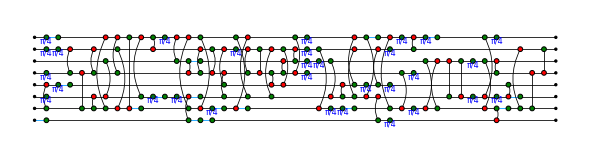

In [ ]:
g = c.to_graph()
zx.draw_matplotlib(g)

In [ ]:
zx.full_reduce(g, quiet=False) # simplifies the Graph in-place, and show the rewrite steps taken.
g.normalize() # Makes the graph more suitable for displaying
zx.draw(g) # Display the resulting diagram

spider_simp: 28. 16. 9. 4.  4 iterations
id_simp: 7.  1 iterations
spider_simp: 6. 1.  2 iterations
pivot_simp: 10. 5. 2. 2. 1. 1. 1. 1.  8 iterations
lcomp_simp: 2. 2.  2 iterations
id_simp: 1.  1 iterations
spider_simp: 1.  1 iterations
pivot_simp: 2. 1.  2 iterations
pivot_gadget_simp: 2. 1.  2 iterations


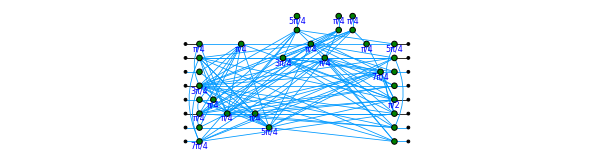

In [ ]:
zx.draw_matplotlib(g)

In [ ]:
c_opt = zx.extract_circuit(g.copy())

In [ ]:
g = c.to_graph()
zx.teleport_reduce(g)
c_opt = zx.Circuit.from_graph(g) # This function is able to reconstruct a Circuit from a Graph that looks sufficiently like a Circuit

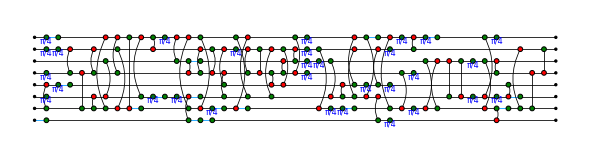

In [ ]:
zx.draw_matplotlib(c_opt)